# "😄 Sentiment Analysis of Cdiscount's Services"

## I. 📑 Importing libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from transformers import AutoTokenizer, MarianMTModel
import torch
from transformers import pipeline
from datasets import Dataset

#### Optimizing performance through Kaggle

In [26]:
df = pd.read_csv('/kaggle/input/raw-data/raw_data.csv')

In [27]:
df.head(5)

,Date,Author,Body,Heading,Rating,Location
0,2025-02-12,fontyne mathieu,Cdiscount ont refusé de répondre par téléphone...,Fuyez Cdiscount!!!,5,FR
1,2025-02-12,Bastien Teil,Achat d'une poussette en 2023 (vendeur CDiscou...,Le service client n'est pas au rendez vous,2,FR
2,2025-02-11,Yvette,"Bonjour, Je tiens à signaler le sérieux de cdi...",Bonjour,4,FR
3,2025-02-11,SYLVIE SOLLE,J’ai commandé un siège auto sur Cdiscount. Mon...,Abandonner mondial Relay,2,FR
4,2025-02-07,jessica hinck,"Franchement, je suis déçu par le site en génér...",Déçu,3,FR


In [28]:
print(df.info())
print(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4242 non-null   object
 1   Author    4242 non-null   object
 2   Body      4242 non-null   object
 3   Heading   4242 non-null   object
 4   Rating    4242 non-null   int64 
 5   Location  4242 non-null   object
dtypes: int64(1), object(5)
memory usage: 199.0+ KB
None
              Date  Author                Body  Heading Location
count         4242    4242                4242     4242     4242
unique         367    4045                4201     3967       35
top     2024-04-30  Client  rapide et efficace  Bonjour       FR
freq            31      25                   6       15     4119


## II. 🧹 Data Cleaning

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns=['Author'], inplace=True)
df.drop(columns=['Location'], inplace=True)

In [30]:
# Combining both columns: 'Body' and 'Heading'
reviews= []

for row  in range (0, len(df.index)):
    reviews.append(" ".join(str(x) for x in df.iloc[row, 1:3]))

In [31]:
reviews[0]

"Cdiscount ont refusé de répondre par téléphone \nà mes questions avant achat (0970809050) \n\nparcque je ne voulais pas donner mon numéro de téléphone portable avec mon nom et mon adresse\n\nj'ai expliqué que je n’était pas client Cdiscount \net que je voulais juste me renseigné avant achat, \nmais il ont refusé????\n\nsur leur site internet, lorsque vous voulez commandez un pc portable gamer, lors de la commande il précise au niveau de la garantie soit vous refusez la garantie commerciale soit vous payez très cher, c'est hallucinant!! pas de garantie constructeur????\n\nsur certains pc portable gamer il n'y a pas de système d'exploitation fourni, pas de Windows 11 ???\n\net certains PC ne sont pas neuf mais reconditionné!!!!\n\nRéponse à Damien: \nVous êtes sournois et trompeur,\npourquoi ne m'ont t'il pas orientez directement ???\n\npour la garantie vous mentez, lorsque vous êtes sur le site vous avez sous pas de garantie commerciale par défaut clairement précisé soit vous payez trè

In [32]:
# Clean the content of the reviews list

clean_reviews = []

for i in range (0, len(reviews)):
    clean_reviews.append(re.sub(r'\n+', '', reviews[i])) # remove \n


In [33]:
clean_reviews[0]

"Cdiscount ont refusé de répondre par téléphone à mes questions avant achat (0970809050) parcque je ne voulais pas donner mon numéro de téléphone portable avec mon nom et mon adressej'ai expliqué que je n’était pas client Cdiscount et que je voulais juste me renseigné avant achat, mais il ont refusé????sur leur site internet, lorsque vous voulez commandez un pc portable gamer, lors de la commande il précise au niveau de la garantie soit vous refusez la garantie commerciale soit vous payez très cher, c'est hallucinant!! pas de garantie constructeur????sur certains pc portable gamer il n'y a pas de système d'exploitation fourni, pas de Windows 11 ???et certains PC ne sont pas neuf mais reconditionné!!!!Réponse à Damien: Vous êtes sournois et trompeur,pourquoi ne m'ont t'il pas orientez directement ???pour la garantie vous mentez, lorsque vous êtes sur le site vous avez sous pas de garantie commerciale par défaut clairement précisé soit vous payez très cherpas étonnant vos prix bas avec u

In [34]:
df['total_review'] = clean_reviews

In [35]:
df

,Date,Body,Heading,Rating,total_review
0,2025-02-12,Cdiscount ont refusé de répondre par téléphone...,Fuyez Cdiscount!!!,5,Cdiscount ont refusé de répondre par téléphone...
1,2025-02-12,Achat d'une poussette en 2023 (vendeur CDiscou...,Le service client n'est pas au rendez vous,2,Achat d'une poussette en 2023 (vendeur CDiscou...
2,2025-02-11,"Bonjour, Je tiens à signaler le sérieux de cdi...",Bonjour,4,"Bonjour, Je tiens à signaler le sérieux de cdi..."
3,2025-02-11,J’ai commandé un siège auto sur Cdiscount. Mon...,Abandonner mondial Relay,2,J’ai commandé un siège auto sur Cdiscount. Mon...
4,2025-02-07,"Franchement, je suis déçu par le site en génér...",Déçu,3,"Franchement, je suis déçu par le site en génér..."
...,...,...,...,...,...
4237,2024-02-13,"Livraison parfaite, produit en générale de bon...",Livraison parfaite,1,"Livraison parfaite, produit en générale de bon..."
4238,2024-02-13,les livraisons sont rapide et gratuite car j'a...,les livraisons sont rapide et gratuite…,5,les livraisons sont rapide et gratuite car j'a...
4239,2024-02-13,"Comme d'habitude, sur ces sites de vente en li...",Comme d'habitude....avis négatif refusé...,2,"Comme d'habitude, sur ces sites de vente en li..."
4240,2024-02-13,"Bonjour,\nJe suis déçue d'un jouet pour enfant...",Déçue,1,"Bonjour,Je suis déçue d'un jouet pour enfant e..."


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4242 non-null   datetime64[ns]
 1   Body          4242 non-null   object        
 2   Heading       4242 non-null   object        
 3   Rating        4242 non-null   int64         
 4   total_review  4242 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 165.8+ KB


## III. 🕵️ Data Exploration

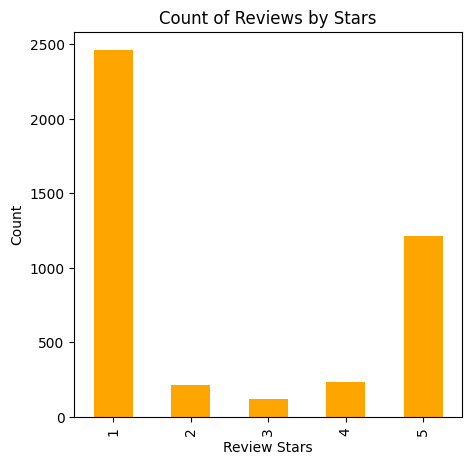

In [37]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(5, 5),
          color="orange")

ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')
plt.show()

### Evaluating Cdiscount's quarterly performance based on customer ratings and reviews from 2024-02-13 to 2025-02-13

In [38]:
#Create 4 dataframes to have 4 periods equals (91 days)

df1 = df[(df['Date'] >= '2024-02-13') & (df['Date'] <= '2024-05-14')]
df2 = df[(df['Date'] >= '2024-05-15') & (df['Date'] <= '2024-08-14')]
df3 = df[(df['Date'] >= '2024-08-15') & (df['Date'] <= '2024-11-14')]
df4 = df[(df['Date'] >= '2024-11-15') & (df['Date'] <= '2025-02-13')]


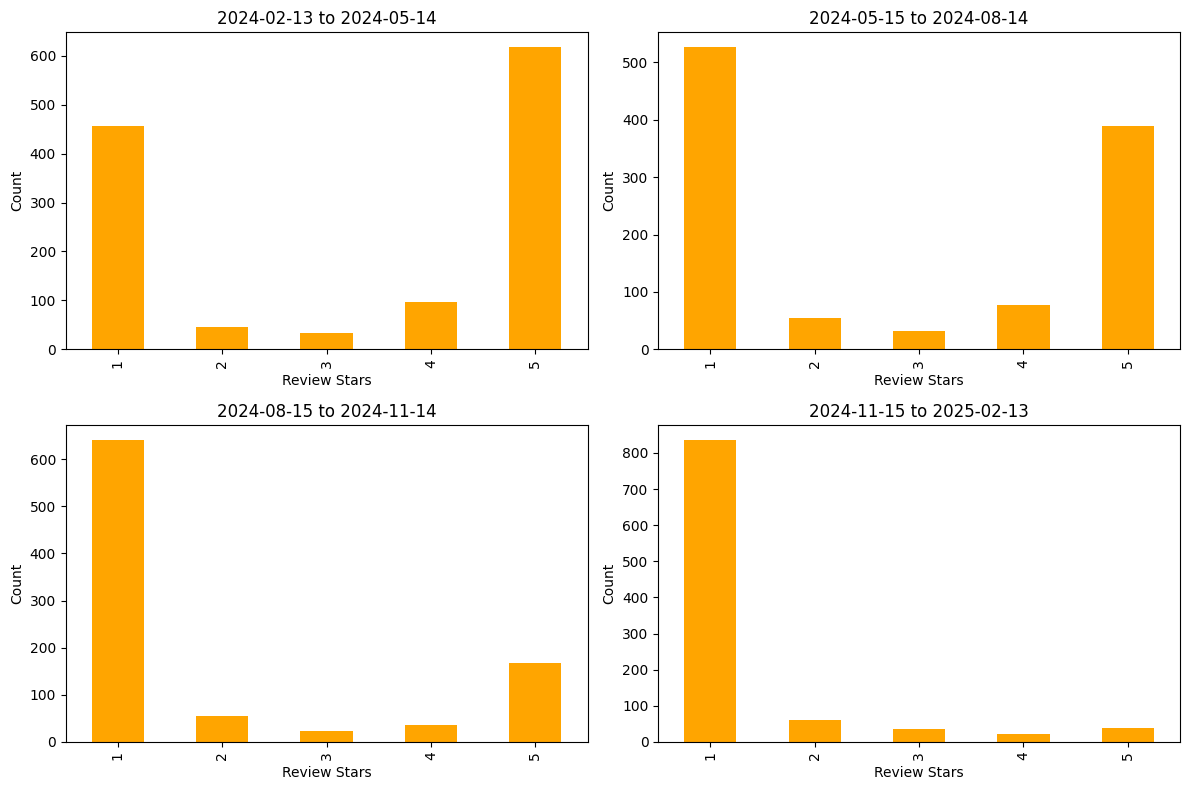

In [39]:
dfs = [df1, df2, df3, df4]  # List of DataFrames
titles = [
    "2024-02-13 to 2024-05-14",
    "2024-05-15 to 2024-08-14",
    "2024-08-15 to 2024-11-14",
    "2024-11-15 to 2025-02-13"
]

# subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

for i, ax in enumerate(axes.flatten()):  
    df = dfs[i]
    df['Rating'].value_counts().sort_index().plot(
        kind='bar',
        ax=ax,  
        color="orange",
        title=titles[i]
    )
    ax.set_xlabel('Review Stars')
    ax.set_ylabel('Count')

# adjustment to layout so plots do not overlap
plt.tight_layout()
plt.show()


In [40]:
for i in range(4):
    df = dfs[i]
    print(f"The mean rating of df[{i+1}] id {df['Rating'].mean()}")

The mean rating of df[1] id 3.2968
The mean rating of df[2] id 2.7675925925925924
The mean rating of df[3] id 1.9489130434782609
The mean rating of df[4] id 1.3508064516129032


## IV. 😍😐😡 Leveraging Hugging Face Models for Advanced Sentiment Analysis

In [41]:
df.head(5)

,Date,Body,Heading,Rating,total_review
0,2025-02-12,Cdiscount ont refusé de répondre par téléphone...,Fuyez Cdiscount!!!,5,Cdiscount ont refusé de répondre par téléphone...
1,2025-02-12,Achat d'une poussette en 2023 (vendeur CDiscou...,Le service client n'est pas au rendez vous,2,Achat d'une poussette en 2023 (vendeur CDiscou...
2,2025-02-11,"Bonjour, Je tiens à signaler le sérieux de cdi...",Bonjour,4,"Bonjour, Je tiens à signaler le sérieux de cdi..."
3,2025-02-11,J’ai commandé un siège auto sur Cdiscount. Mon...,Abandonner mondial Relay,2,J’ai commandé un siège auto sur Cdiscount. Mon...
4,2025-02-07,"Franchement, je suis déçu par le site en génér...",Déçu,3,"Franchement, je suis déçu par le site en génér..."


In [43]:
# so the Hugging face's model perfomrs better, beacause it stops the translation if the sentence dosen't end by a point.
# for example "Qu'on fait qelque chose! et je" --> "Let's do something!" |||| but if we had "Qu'on fait qelque chose! et je."  --> "Let's do something! and I."
# so we need to add a point at the end of the sentence if it doesn't end by
def add_point(string:str):
    return string+'.'

df1.loc[:, 'total_review'] = df1['total_review'].apply(add_point)
df2.loc[:, 'total_review'] = df2['total_review'].apply(add_point)
df3.loc[:, 'total_review'] = df3['total_review'].apply(add_point)
df4.loc[:, 'total_review'] = df4['total_review'].apply(add_point)

In [44]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 20.2 MB/s eta 0:00:0000:01


In [45]:
from transformers import MarianMTModel, AutoTokenizer
import re  # To split the text into sentences

# Model configuration
src = "fr"  # Source language
trg = "en"  # Target language

model_name = f"Helsinki-NLP/opus-mt-{src}-{trg}"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Function to extract the first sentence of a review
def get_first_sentence(text):
    sentences = re.split(r"[.!?]", text)  # Split text into sentences
    return sentences[0].strip() if sentences else text.strip()  # Return the first sentence

# Function to translate text
def translate_fr2eng(text):
    first_sentence = get_first_sentence(text)  # Extract the first sentence
    inputs = tokenizer([first_sentence], return_tensors="pt", truncation=True)  # Tokenize the text
    generated_ids = model.generate(**inputs)  # Generate translation
    return tokenizer.decode(generated_ids[0], skip_special_tokens=True)  # Decode translation

# Apply translation with .loc to avoid "SettingWithCopyWarning"
df1.loc[:, 'translated_review'] = df1['total_review'].apply(translate_fr2eng)
df2.loc[:, 'translated_review'] = df2['total_review'].apply(translate_fr2eng)
df3.loc[:, 'translated_review'] = df3['total_review'].apply(translate_fr2eng)
df4.loc[:, 'translated_review'] = df4['total_review'].apply(translate_fr2eng)


<ipython-input-45-f89cc3b26c40>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'translated_review'] = df1['total_review'].apply(translate_fr2eng)
<ipython-input-45-f89cc3b26c40>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'translated_review'] = df2['total_review'].apply(translate_fr2eng)
<ipython-input-45-f89cc3b26c40>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [46]:
df1.head(4)

,Date,Body,Heading,Rating,total_review,translated_review
2992,2024-05-14,Je commande régulièrement sur Cdiscount mais j...,Déception mauvaise expérience,1,Je commande régulièrement sur Cdiscount mais j...,I regularly order on Cdiscount but I won't ord...
2993,2024-05-14,Facilité de navigation,Facilité de navigation,5,Facilité de navigation Facilité de navigation..,Ease of navigation Ease of navigation Ease of ...
2994,2024-05-14,excellente,parfait,5,excellente parfait..,excellent perfect
2995,2024-05-14,J'ai passé une commande que j'ai bien reçu mai...,Escroquerie à l'abonnement,1,J'ai passé une commande que j'ai bien reçu mai...,I placed an order that I received well but by ...


In [59]:
print(df1['total_review'].iloc[0])

Je commande régulièrement sur Cdiscount mais je ne commanderai plus d article trop cher j ai acheté une table en céramique qui provient de chez vente unique photo non contractuel je ne peux pas mettre de chaise dessous car socle trop important pour une table design je résume je ne peux pas ranger les chaises en dessous donc déport de plusieurs centimètres pas pratique du tout pour une table design sans avis client à plus de 1000 euros et si retour je devais payer à ma charge pour une table de 130 kg je vous laisse imaginer donc attention à ce que vous achetez aucun geste commercial et si je résume la livraison le chauffeur est venu seul avec un camion sans hayon pour décharger j ai du aller chercher des voisins une honte !!! Sav déplorable  Déception mauvaise expérience ..


In [58]:
print(df1['translated_review'].iloc[0])

I regularly order on Cdiscount but I won't order any more too expensive item I bought a ceramic table that comes from single sale non contractual photo I can not put a chair under because too important base for a design table I sum up I can not store the chairs below so not convenient several centimeters at all for a design table without customer review at more than 1000 euros and if back I had to pay at my expense for a table of 130 kg I let you imagine so be careful that you buy no commercial gesture and if I sum up the delivery the driver came alone with a truck without a hatch to unload I had to go get neighbors a shame


### 🤔💡 Since the review ratings are predominantly either 5 or 1, with the other ratings being significantly less frequent, I will opt for binary classification.

In [61]:

# Load the sentiment analysis pipeline
# The model used here is "distilbert-base-uncased-finetuned-sst-2-english" for binary sentiment classification
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

for i in range(len(dfs)):
    df = dfs[i]
    translated_reviews = df['translated_review']
    # Apply sentiment analysis to each review
    # The pipeline returns a dictionary with 'label' (sentiment) and 'score' (confidence score)
    sentiments = translated_reviews.apply(lambda x: sentiment_analyzer(x)[0])

    # Add sentiment labels (e.g., POSITIVE, NEGATIVE) to the DataFrame
    df['sentiment'] = sentiments.apply(lambda x: x['label'])

    # Add sentiment confidence scores to the DataFrame
    df['sentiment_score'] = sentiments.apply(lambda x: x['score'])


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
<ipython-input-61-6a72423ec24c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = sentiments.apply(lambda x: x['label'])
<ipython-input-61-6a72423ec24c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = sentiments.apply(lambda x: x['score'])
<ipython-input-61-6a72423ec24c>:13: SettingWithCopyWarning: 
A value is trying to be set on a 

In [65]:
df1.head(4)

,Date,Body,Heading,Rating,total_review,translated_review,sentiment,sentiment_score
2992,2024-05-14,Je commande régulièrement sur Cdiscount mais j...,Déception mauvaise expérience,1,Je commande régulièrement sur Cdiscount mais j...,I regularly order on Cdiscount but I won't ord...,NEGATIVE,0.998483
2993,2024-05-14,Facilité de navigation,Facilité de navigation,5,Facilité de navigation Facilité de navigation..,Ease of navigation Ease of navigation Ease of ...,POSITIVE,0.998472
2994,2024-05-14,excellente,parfait,5,excellente parfait..,excellent perfect,POSITIVE,0.999857
2995,2024-05-14,J'ai passé une commande que j'ai bien reçu mai...,Escroquerie à l'abonnement,1,J'ai passé une commande que j'ai bien reçu mai...,I placed an order that I received well but by ...,NEGATIVE,0.996381


In [66]:

# Load the Hugging Face sentiment analysis pipeline with CUDA
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)


# Function to analyze sentiment for a single review
def analyze_sentiment(review):
    return classifier(review)[0]['label']

for i in range(len(dfs)):
    df = dfs[i]
    # Create a Hugging Face Dataset for batch processing
    dataset = Dataset.from_pandas(df[['translated_review']])  # Convert DataFrame to Dataset

    # Use the dataset's map function to apply the sentiment analysis pipeline in batches
    results = dataset.map(lambda x: {"sentiment": analyze_sentiment(x['translated_review'])}, batched=False)

    # Add the results back to the original DataFrame
    df['sentiment'] = results['sentiment']  # Avoid SettingWithCopyWarning


Device set to use cuda:0


Map:   0%|          | 0/1250 [00:00<?, ? examples/s]

<ipython-input-66-e7725c1b011f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = results['sentiment']  # Avoid SettingWithCopyWarning


Map:   0%|          | 0/1080 [00:00<?, ? examples/s]

<ipython-input-66-e7725c1b011f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = results['sentiment']  # Avoid SettingWithCopyWarning


Map:   0%|          | 0/920 [00:00<?, ? examples/s]

<ipython-input-66-e7725c1b011f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = results['sentiment']  # Avoid SettingWithCopyWarning


Map:   0%|          | 0/992 [00:00<?, ? examples/s]

<ipython-input-66-e7725c1b011f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = results['sentiment']  # Avoid SettingWithCopyWarning


In [67]:
df1

,Date,Body,Heading,Rating,total_review,translated_review,sentiment,sentiment_score
2992,2024-05-14,Je commande régulièrement sur Cdiscount mais j...,Déception mauvaise expérience,1,Je commande régulièrement sur Cdiscount mais j...,I regularly order on Cdiscount but I won't ord...,NEGATIVE,0.998483
2993,2024-05-14,Facilité de navigation,Facilité de navigation,5,Facilité de navigation Facilité de navigation..,Ease of navigation Ease of navigation Ease of ...,POSITIVE,0.998472
2994,2024-05-14,excellente,parfait,5,excellente parfait..,excellent perfect,POSITIVE,0.999857
2995,2024-05-14,J'ai passé une commande que j'ai bien reçu mai...,Escroquerie à l'abonnement,1,J'ai passé une commande que j'ai bien reçu mai...,I placed an order that I received well but by ...,NEGATIVE,0.996381
2996,2024-05-14,facile d'utilisation,facile d'utilisation,5,facile d'utilisation facile d'utilisation..,easy to use easy to use,POSITIVE,0.992761
...,...,...,...,...,...,...,...,...
4237,2024-02-13,"Livraison parfaite, produit en générale de bon...",Livraison parfaite,1,"Livraison parfaite, produit en générale de bon...","Perfect delivery, usually good quality product...",NEGATIVE,0.999072
4238,2024-02-13,les livraisons sont rapide et gratuite car j'a...,les livraisons sont rapide et gratuite…,5,les livraisons sont rapide et gratuite car j'a...,the deliveries are fast and free because I hav...,POSITIVE,0.999724
4239,2024-02-13,"Comme d'habitude, sur ces sites de vente en li...",Comme d'habitude....avis négatif refusé...,2,"Comme d'habitude, sur ces sites de vente en li...","As usual, on these online sales sites, we can ...",NEGATIVE,0.980676
4240,2024-02-13,"Bonjour,\nJe suis déçue d'un jouet pour enfant...",Déçue,1,"Bonjour,Je suis déçue d'un jouet pour enfant e...","Hello,I'm disappointed with a toy for children...",NEGATIVE,0.994022


### 🚀 Further analysis by visualisation

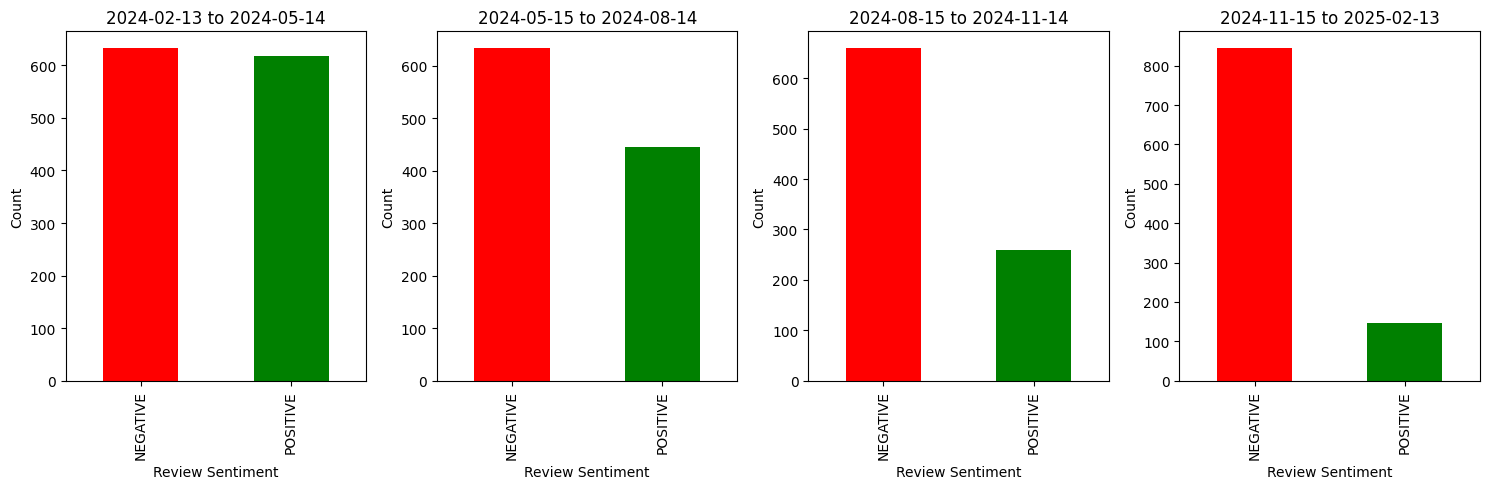

In [69]:

# List of DataFrames (dfs) and corresponding titles (titles)

fig, axes = plt.subplots(nrows=1, ncols=len(dfs), figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    df = dfs[i]
    
    # Count the sentiment values
    sentiment_counts = df['sentiment'].value_counts()
    
    # Customizing the colors
    colors = ['green' if sentiment == 'POSITIVE' else 'red' for sentiment in sentiment_counts.index]
    
    # Plotting the bar chart with dynamic colors for positive and negative
    sentiment_counts.plot(
        kind='bar',
        ax=ax,
        color=colors,
        title=titles[i]
    )
    
    ax.set_xlabel('Review Sentiment')
    ax.set_ylabel('Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


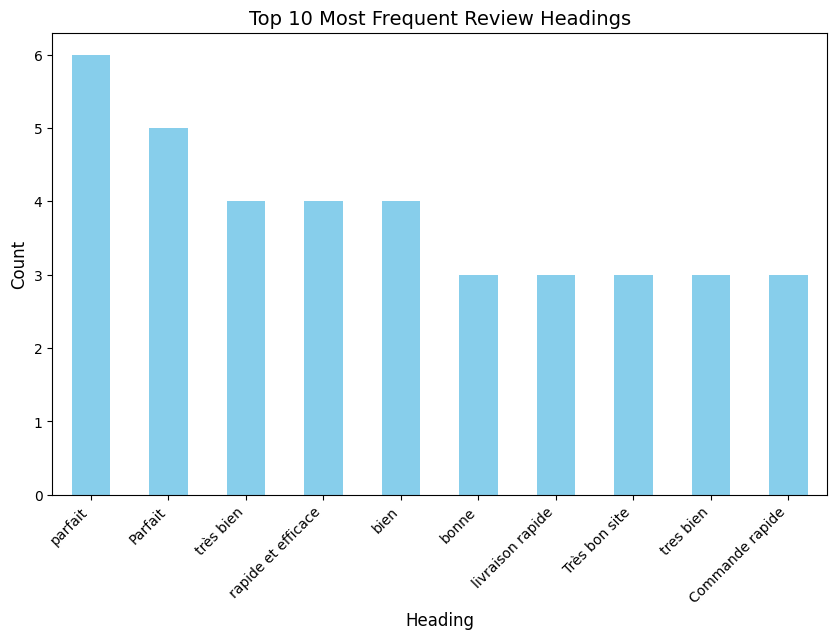

<Figure size 1200x800 with 0 Axes>

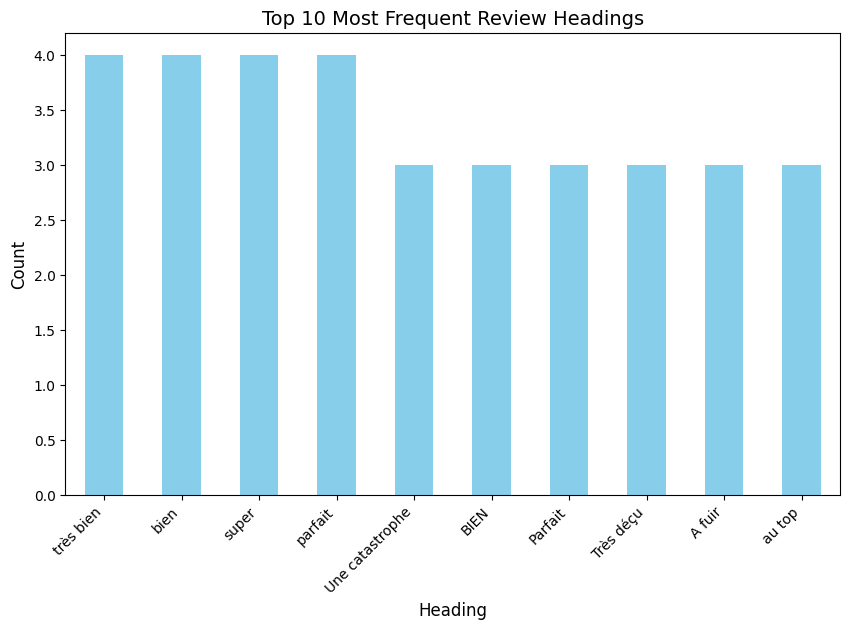

<Figure size 1200x800 with 0 Axes>

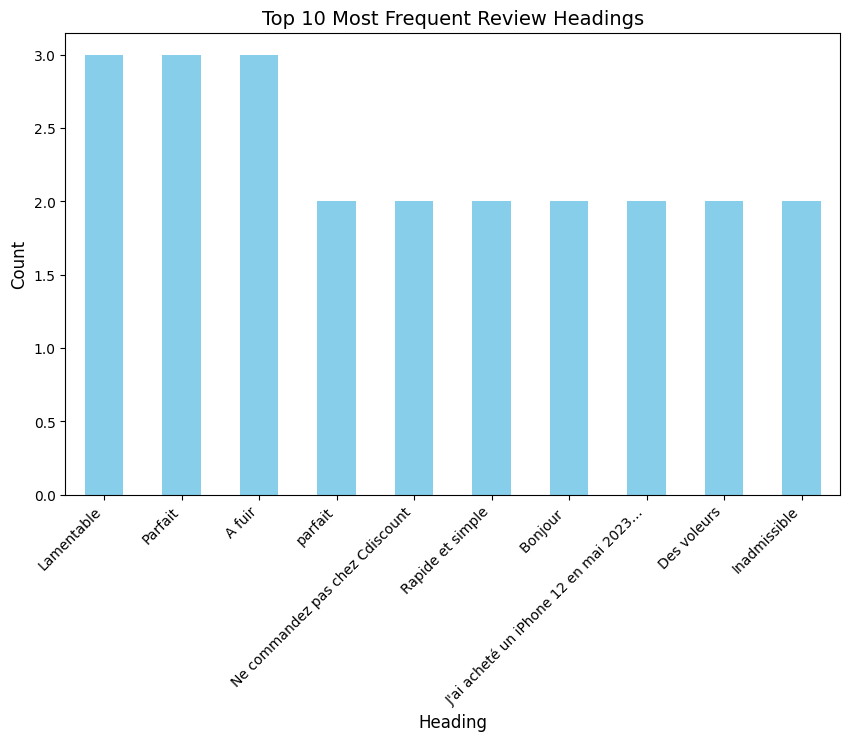

<Figure size 1200x800 with 0 Axes>

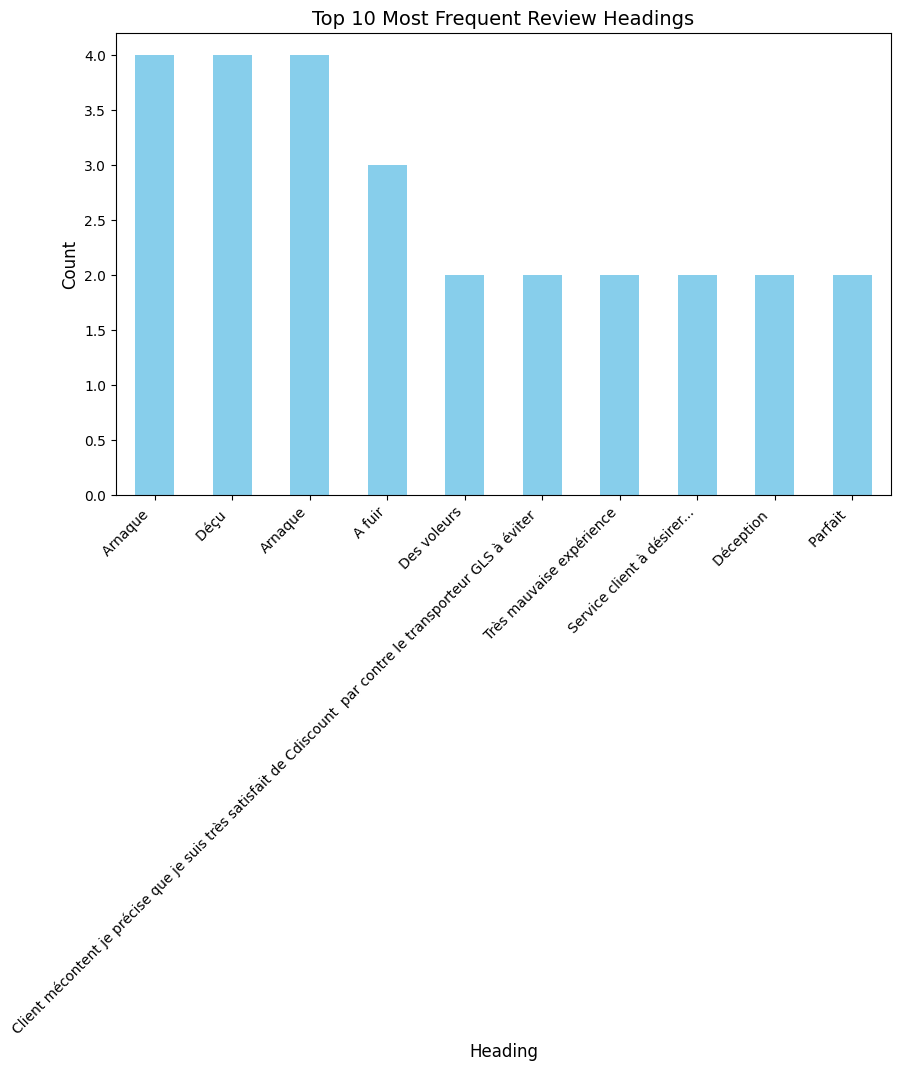

<Figure size 1200x800 with 0 Axes>

In [85]:

for i in range(len(dfs)):
    df = dfs[i]
    # Get the top 10 most frequent headings
    top_10_headings = df[~df['Heading'].isin(['Bonjour'])]['Heading'].value_counts()[:10]

    # Plotting the top 10 headings
    plt.figure(figsize=(10, 6))
    top_10_headings.plot(kind='bar', color='skyblue')

    # Adding titles and labels
    plt.title('Top 10 Most Frequent Review Headings', fontsize=14)
    plt.xlabel('Heading', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Display the plot
    plt.figure(figsize=(12, 8))
    plt.tight_layout()
    plt.show()


In [80]:

for i in range(len(dfs)):
    df = dfs[i][['Rating','sentiment','sentiment_score']]
    df.to_csv(f"/kaggle/working/sentiment_analysis_results_quartile_{i+1}_processed.csv", index=False)

print("Sentiment analysis saved to 'sentiment_analysis_results.csv'.")

Sentiment analysis saved to 'sentiment_analysis_results.csv'.


# **Conclusion:**

**By analyzing customer reviews on Trustpilot from February 13, 2024, to February 13, 2025**, 📊 it appears that Cdiscount's performance is **declining** 📉, with customers becoming **increasingly dissatisfied** 😞 with their services, especially regarding **delivery issues** 🚚. A significant number of customers have reported **not receiving the products** they ordered 🚫📦, highlighting persistent problems with order fulfillment. This signals an urgent need for **improvements** ⚙️ to address these concerns and enhance the overall **customer experience** 😊.

Additionally, **sentiment analysis** 🧠💬 shows a **notable increase** in negative reviews 😡, which have become **much more frequent** than positive ones 😊 over the quarters. The ratio has shifted from **(NEGATIVE ~ POSITIVE)** ➡️ to **(NEGATIVE > 800, POSITIVE < 150)**, further underscoring the growing **customer dissatisfaction** 😔.